In [19]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print(" Imports OK")

 Imports OK


In [21]:
# Fonctions
def generate_full_report(year):
    """Génère un rapport complet pour une année"""
    
    print(f"\n{'='*80}")
    print(f"ANALYSE EXPLORATOIRE - {year}")
    print(f"{'='*80}\n")
    
    # Charger
    df = pd.read_csv(f'../data/processed/DAT_MT_GBPUSD_M15_{year}_clean.csv', parse_dates=['timestamp'])
    df = df.set_index('timestamp')
    
    # Stats de base
    print(f" STATISTIQUES DE BASE")
    print(f"  → Shape: {df.shape}")
    print(f"  → Période: {df.index.min()} → {df.index.max()}")
    print(f"  → Missing values: {df.isnull().sum().sum()}")
    
    # Rendements
    df['return'] = df['close'].pct_change()
    df['log_return'] = np.log(df['close'] / df['close'].shift(1))
    
    print(f"\n RENDEMENTS")
    print(f"  → Rendement moyen: {df['return'].mean():.6f}")
    print(f"  → Volatilité: {df['return'].std():.6f}")
    print(f"  → Skewness: {df['return'].skew():.4f}")
    print(f"  → Kurtosis: {df['return'].kurtosis():.4f}")
    print(f"  → Min: {df['return'].min():.6f}")
    print(f"  → Max: {df['return'].max():.6f}")
    
    # Test ADF
    print(f"\n TEST ADF (Stationnarité)")
    
    # Prix
    adf_price = adfuller(df['close'].dropna())
    print(f"  → Prix:")
    print(f" ADF: {adf_price[0]:.4f}")
    print(f" p-value: {adf_price[1]:.4f}")
    if adf_price[1] < 0.05:
        print(f" STATIONNAIRE")
    else:
        print(f" NON-STATIONNAIRE")
    
    # Rendements
    adf_return = adfuller(df['return'].dropna())
    print(f"  → Rendements:")
    print(f" ADF: {adf_return[0]:.4f}")
    print(f" p-value: {adf_return[1]:.4f}")
    if adf_return[1] < 0.05:
        print(f" STATIONNAIRE")
    else:
        print(f" NON-STATIONNAIRE")
    
    # Patterns horaires
    df['hour'] = df.index.hour
    hourly_stats = df.groupby('hour')['return'].agg(['mean', 'std', 'count'])
    
    print(f"\n PATTERNS HORAIRES")
    print(f"  → Heure la plus volatile: {hourly_stats['std'].idxmax()}h (std={hourly_stats['std'].max():.6f})")
    print(f"  → Heure la moins volatile: {hourly_stats['std'].idxmin()}h (std={hourly_stats['std'].min():.6f})")
    print(f"  → Meilleur rendement moyen: {hourly_stats['mean'].idxmax()}h ({hourly_stats['mean'].max():.6f})")
    
    return df, hourly_stats

In [22]:
# Boucle sur les 3 années

# Stocker les résultats
all_data = {}
all_hourly_stats = {}

# Boucle sur les 3 années
for year in [2022, 2023, 2024]:
    df, hourly_stats = generate_full_report(year)
    all_data[year] = df
    all_hourly_stats[year] = hourly_stats
    
print(f"\n{'='*80}")
print(" RAPPORTS GÉNÉRÉS POUR LES 3 ANNÉES")
print(f"{'='*80}")


ANALYSE EXPLORATOIRE - 2022

 STATISTIQUES DE BASE
  → Shape: (24242, 6)
  → Période: 2022-01-02 18:00:00 → 2022-12-30 16:30:00
  → Missing values: 1

 RENDEMENTS
  → Rendement moyen: -0.000004
  → Volatilité: 0.000844
  → Skewness: -2.2968
  → Kurtosis: 122.5547
  → Min: -0.032972
  → Max: 0.016397

 TEST ADF (Stationnarité)
  → Prix:
 ADF: -1.5241
 p-value: 0.5216
 NON-STATIONNAIRE
  → Rendements:
 ADF: -26.4931
 p-value: 0.0000
 STATIONNAIRE

 PATTERNS HORAIRES
  → Heure la plus volatile: 8h (std=0.001403)
  → Heure la moins volatile: 16h (std=0.000355)
  → Meilleur rendement moyen: 18h (0.000043)

ANALYSE EXPLORATOIRE - 2023

 STATISTIQUES DE BASE
  → Shape: (21043, 6)
  → Période: 2023-01-01 19:00:00 → 2023-12-29 16:30:00
  → Missing values: 1

 RENDEMENTS
  → Rendement moyen: 0.000003
  → Volatilité: 0.000591
  → Skewness: -0.0621
  → Kurtosis: 19.5099
  → Min: -0.009600
  → Max: 0.008748

 TEST ADF (Stationnarité)
  → Prix:
 ADF: -2.0253
 p-value: 0.2756
 NON-STATIONNAIRE
  → R

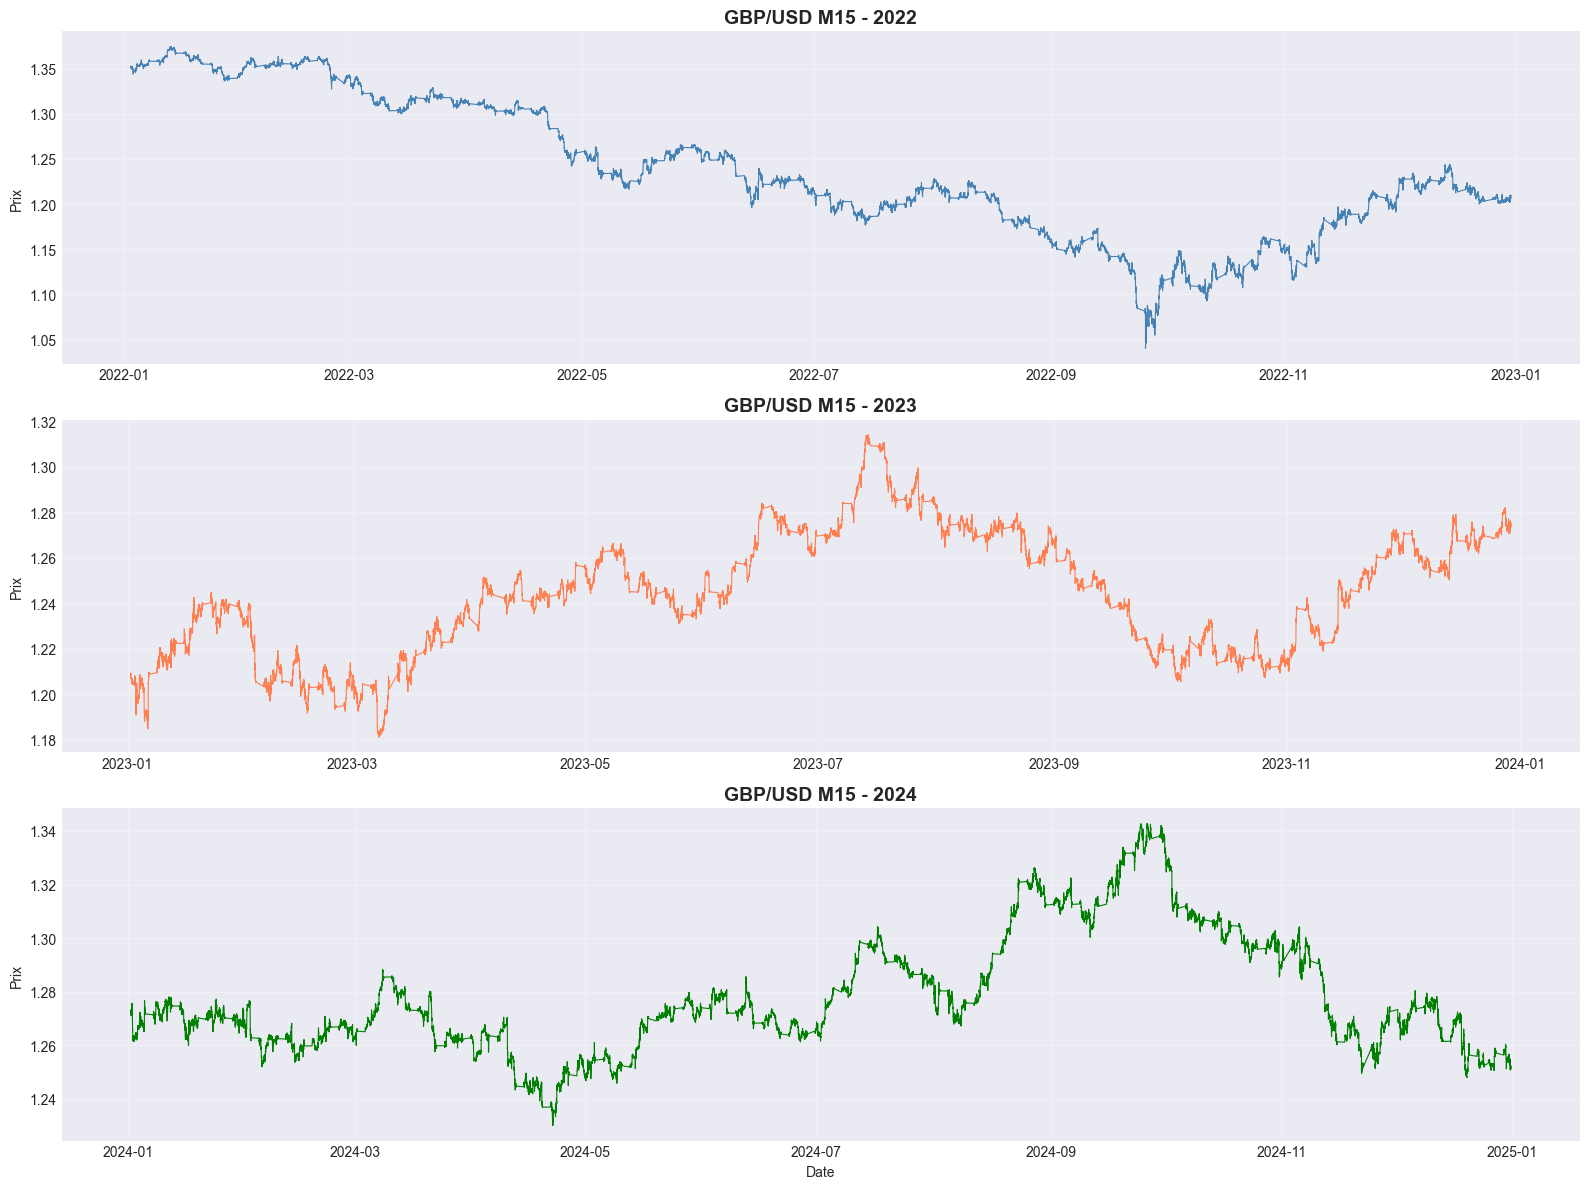

In [23]:
# Comparaison Visuelle - Prix

# Évolution des prix pour les 3 années
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

for i, year in enumerate([2022, 2023, 2024]):
    df = all_data[year]
    axes[i].plot(df.index, df['close'], linewidth=0.8, color=['steelblue', 'coral', 'green'][i])
    axes[i].set_title(f'GBP/USD M15 - {year}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Prix')
    axes[i].grid(True, alpha=0.3)

axes[2].set_xlabel('Date')
plt.tight_layout()
plt.show()

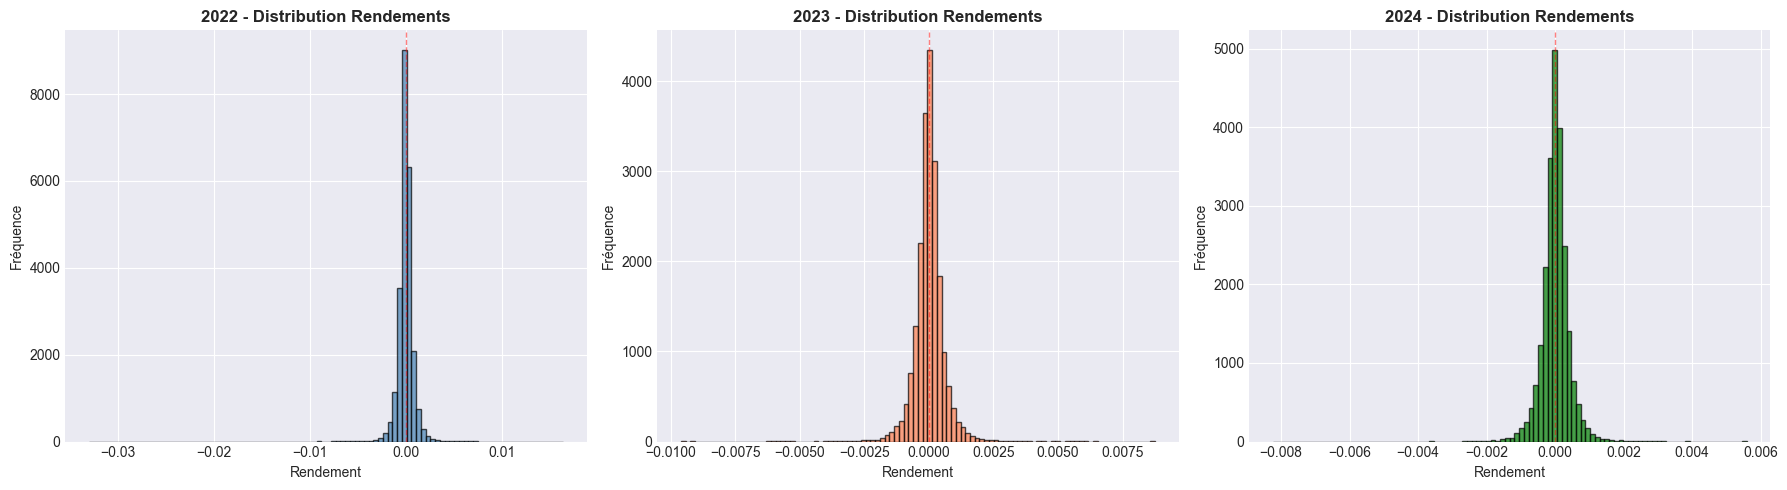

In [24]:
# Comparaison - Distribution des Rendements

# Distribution des rendements
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, year in enumerate([2022, 2023, 2024]):
    df = all_data[year]
    axes[i].hist(df['return'].dropna(), bins=100, edgecolor='black', alpha=0.7, color=['steelblue', 'coral', 'green'][i])
    axes[i].set_title(f'{year} - Distribution Rendements', fontweight='bold')
    axes[i].set_xlabel('Rendement')
    axes[i].set_ylabel('Fréquence')
    axes[i].axvline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.show()

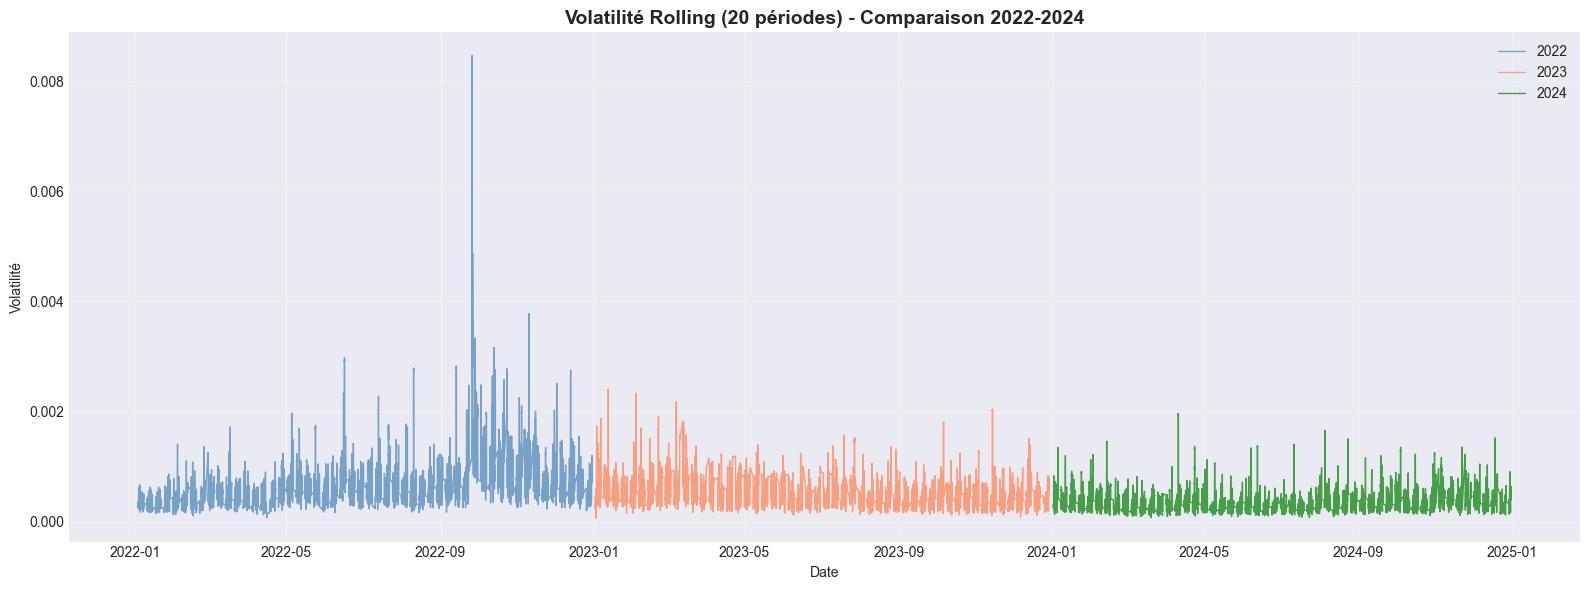

In [25]:
# Comparaison - Volatilité

# Volatilité rolling pour les 3 années
fig, ax = plt.subplots(figsize=(16, 6))

colors = ['steelblue', 'coral', 'green']
for i, year in enumerate([2022, 2023, 2024]):
    df = all_data[year]
    df['volatility_20'] = df['return'].rolling(20).std()
    ax.plot(df.index, df['volatility_20'], linewidth=1, alpha=0.7, color=colors[i], label=f'{year}')

ax.set_title('Volatilité Rolling (20 périodes) - Comparaison 2022-2024', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Volatilité')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

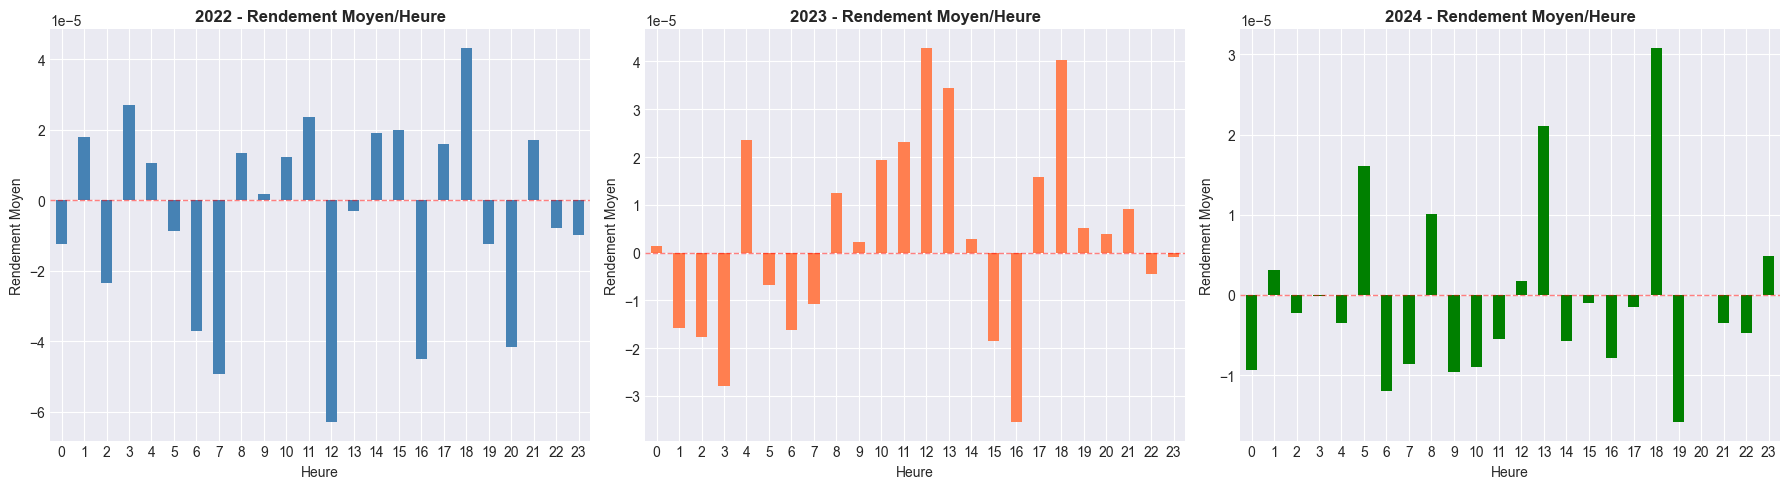

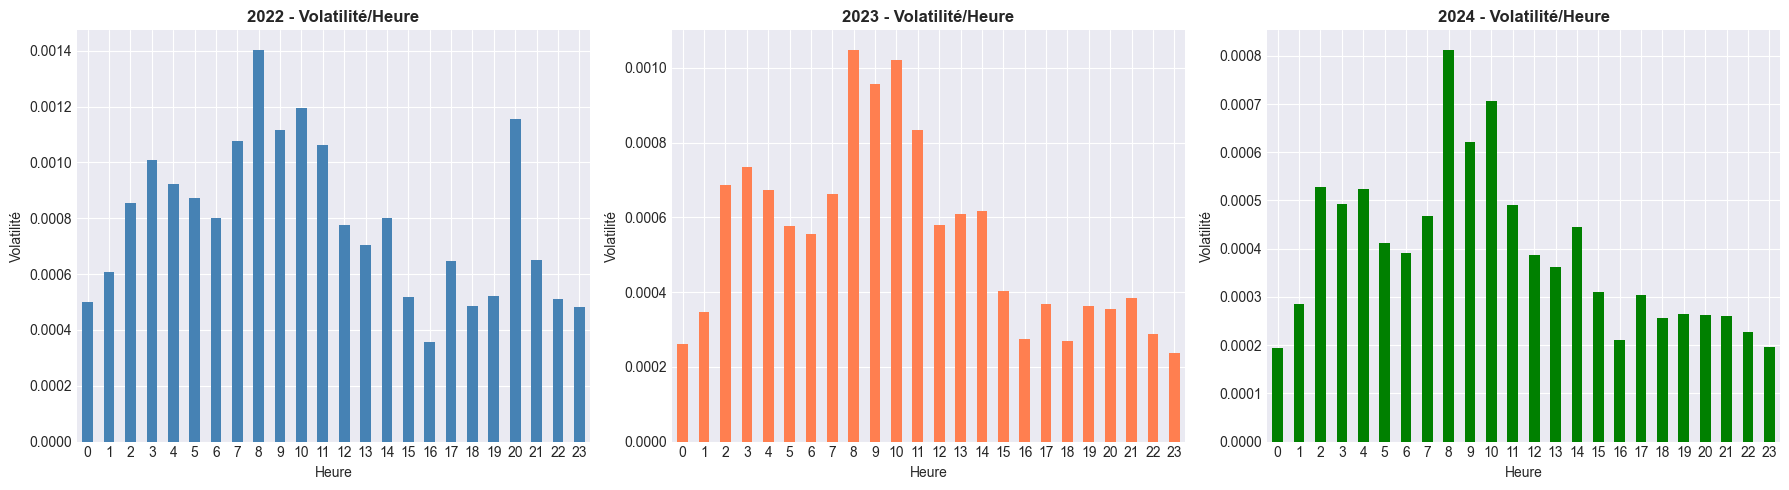

In [26]:
# Comparaison - Patterns Horaires

# Patterns horaires - Rendement moyen par heure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, year in enumerate([2022, 2023, 2024]):
    hourly = all_hourly_stats[year]
    hourly['mean'].plot(kind='bar', ax=axes[i], color=['steelblue', 'coral', 'green'][i])
    axes[i].set_title(f'{year} - Rendement Moyen/Heure', fontweight='bold')
    axes[i].set_xlabel('Heure')
    axes[i].set_ylabel('Rendement Moyen')
    axes[i].axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Patterns horaires - Volatilité par heure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, year in enumerate([2022, 2023, 2024]):
    hourly = all_hourly_stats[year]
    hourly['std'].plot(kind='bar', ax=axes[i], color=['steelblue', 'coral', 'green'][i])
    axes[i].set_title(f'{year} - Volatilité/Heure', fontweight='bold')
    axes[i].set_xlabel('Heure')
    axes[i].set_ylabel('Volatilité')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


 TABLEAU RÉCAPITULATIF

 Année  Nb Bougies  Prix Min  Prix Max   Rend. Moyen  Volatilité  Skewness   Kurtosis
  2022       24242   1.04000   1.37461 -4.249020e-06    0.000844 -2.296832 122.554718
  2023       21043   1.18117   1.31397  2.634480e-06    0.000591 -0.062143  19.509884
  2024       23820   1.23011   1.34280 -6.035558e-07    0.000430 -0.360348  23.762900


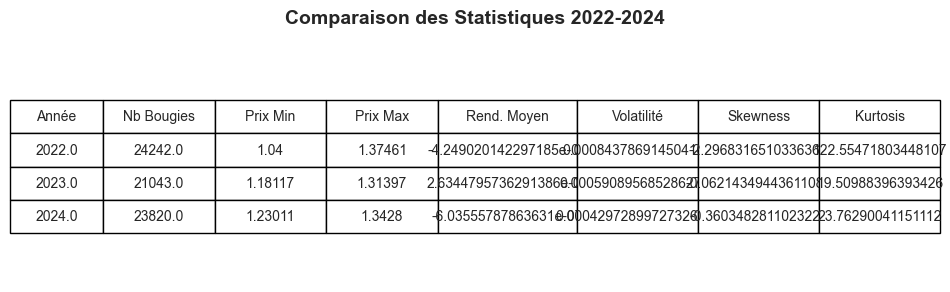

In [27]:
# Tableau Récapitulatif

# Tableau comparatif
summary = []

for year in [2022, 2023, 2024]:
    df = all_data[year]
    summary.append({
        'Année': year,
        'Nb Bougies': len(df),
        'Prix Min': df['close'].min(),
        'Prix Max': df['close'].max(),
        'Rend. Moyen': df['return'].mean(),
        'Volatilité': df['return'].std(),
        'Skewness': df['return'].skew(),
        'Kurtosis': df['return'].kurtosis()
    })

summary_df = pd.DataFrame(summary)
print("\n TABLEAU RÉCAPITULATIF\n")
print(summary_df.to_string(index=False))

# Visualisation du tableau
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, 
                 cellLoc='center', loc='center', colWidths=[0.1, 0.12, 0.12, 0.12, 0.15, 0.13, 0.13, 0.13])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
plt.title('Comparaison des Statistiques 2022-2024', fontsize=14, fontweight='bold', pad=20)
plt.show()

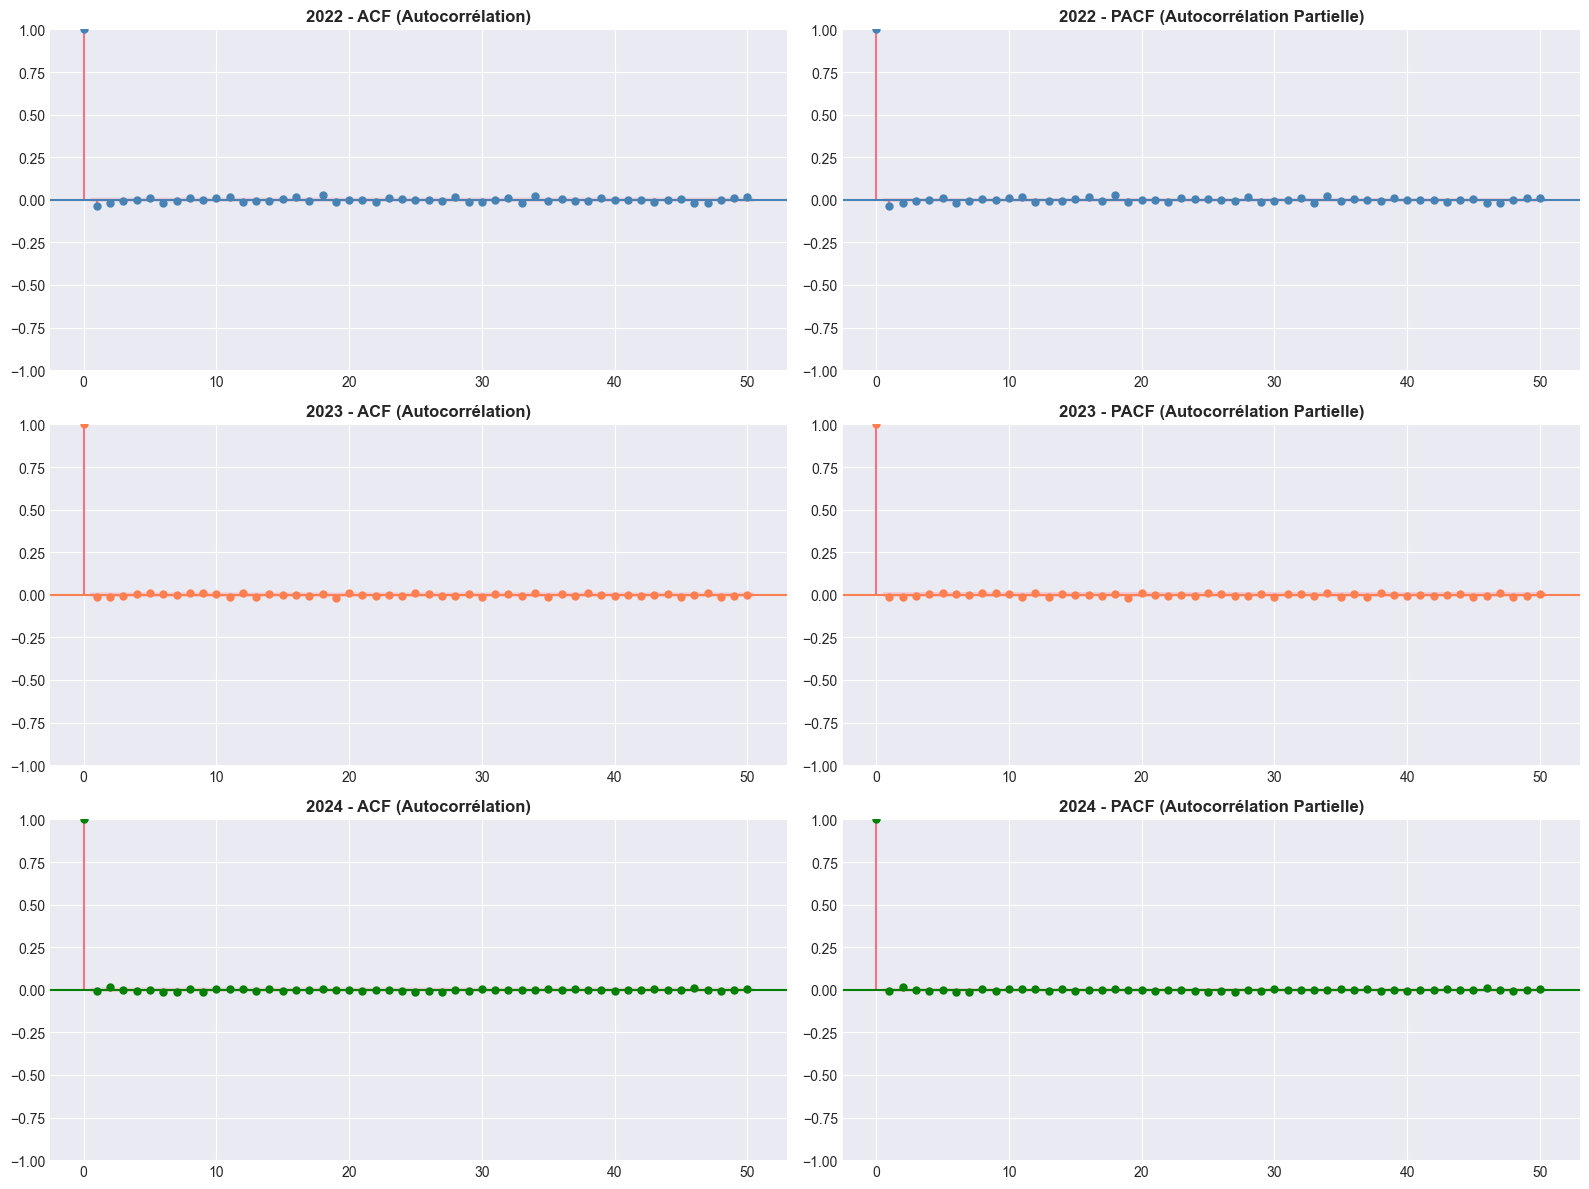

In [28]:
# ACF / PACF pour chaque année
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

for i, year in enumerate([2022, 2023, 2024]):
    df = all_data[year]
    
    # ACF
    plot_acf(df['return'].dropna(), lags=50, ax=axes[i, 0], color=['steelblue', 'coral', 'green'][i])
    axes[i, 0].set_title(f'{year} - ACF (Autocorrélation)', fontweight='bold')
    
    # PACF
    plot_pacf(df['return'].dropna(), lags=50, ax=axes[i, 1], color=['steelblue', 'coral', 'green'][i])
    axes[i, 1].set_title(f'{year} - PACF (Autocorrélation Partielle)', fontweight='bold')

plt.tight_layout()
plt.show()